## Data Analysis Project: Best Books Ever dataset

In this project, we will work with GoodReads Best Books dataset and we will try load data from already cleaned and normalized dataset and do some analysis of the data.

### Objectives

*   Reading data from tables
*   Practice analyzing data.

## Start
Let's import the libraries that we will use for our project:

In [1]:
import pandas as pd  # Data manipulation and analysis library
from sqlalchemy import (create_engine) # SQL toolkit and Object-Relational Mapping (ORM)
import config as cfg  # Configuration file
import matplotlib.pyplot as plt
%matplotlib inline

Let's describe our environment variables:

In [2]:
DATABASE = "book_data"
HOSTNAME = cfg.HOSTNAME
USER = cfg.USER
PASSWORD = cfg.PASSWORD
CONNECTION_STRING = f"mysql+pymysql://{USER}:{PASSWORD}@{HOSTNAME}/{DATABASE}"

Let's create a new Engine instance. This Engine instance will serve as the interface to your MySQL database, allowing you to execute SQL commands and interact with the database within your Jupyter notebook:

In [3]:
engine = create_engine(CONNECTION_STRING)

## Data Analysis

We'll now perform some quick analysis on this dataset.
Let's check which book format is the most common:

In [4]:
books = "SELECT * FROM books;"
ratings_and_bbe_scores = "SELECT * FROM ratings_and_bbe_scores;"
books = pd.read_sql(books, engine)
ratings_and_bbe_scores = pd.read_sql(ratings_and_bbe_scores, engine)
print(books['book_format'].value_counts(normalize=True).head(5))

book_format
Paperback                0.524916
Hardcover                0.240545
Kindle Edition           0.114306
Mass Market Paperback    0.050362
ebook                    0.049950
Name: proportion, dtype: float64


As we can see the most common book format is 'Paperback'.
Now let's see which book formats are the most expensive ones grouping them by price:

In [5]:
books.groupby('book_format').price.mean().sort_values(ascending=False).head(5)

book_format
Capa Mole              162.485
Rústica                119.000
Digital                 75.950
Slipcased Hardcover     75.772
Bonded Leather          51.030
Name: price, dtype: float64

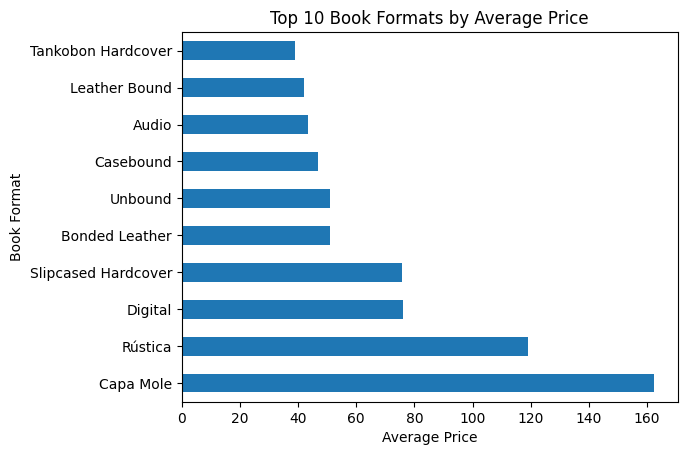

In [6]:
mean_prices = books.groupby('book_format').price.mean()
top_five_mean_prices = mean_prices.nlargest(10)
top_five_mean_prices.plot.barh()
plt.xlabel('Average Price')
plt.ylabel('Book Format')
plt.title('Top 10 Book Formats by Average Price')
plt.show()

Now, let's check the top 10 highest-rated books with more than 10,000 ratings. To do so, we will need to merge data from 'books' and 'ratings_and_bbe_scores' dataframes, likely using the book ID as the common key for merging. We will then filter for books that have both more than 10,000 ratings and a high average rating:

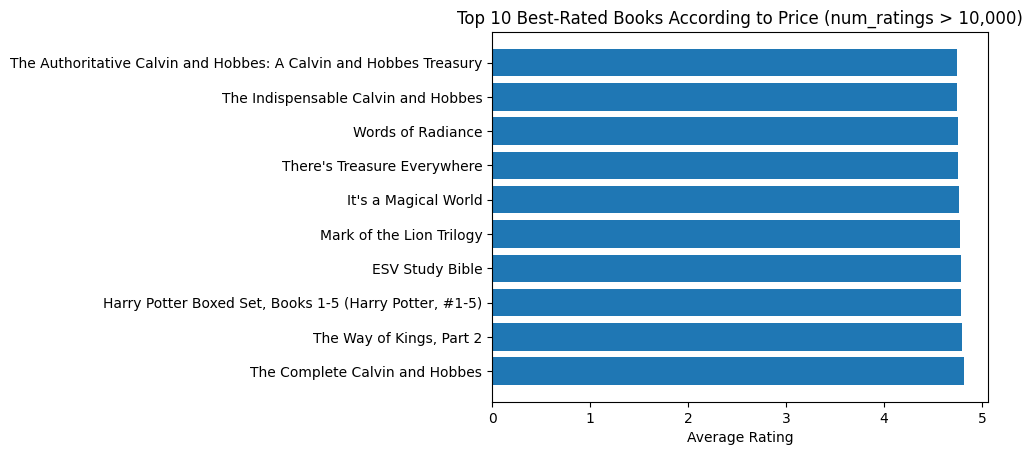

In [7]:
merged_books_ratings = pd.merge(books, ratings_and_bbe_scores, on='book_id')

filtered_books_ratings = merged_books_ratings[merged_books_ratings['num_ratings'] > 10000]
book_analysis = filtered_books_ratings.groupby(['book_id', 'title', 'price']).agg(avg_rating=('rating', 'mean')).reset_index()

sorted_books = book_analysis.sort_values(by=['avg_rating', 'price'], ascending=[False, True])
top_books = sorted_books.head(10)

plt.barh(top_books['title'], top_books['avg_rating'])
plt.xlabel('Average Rating')
plt.title('Top 10 Best-Rated Books According to Price (num_ratings > 10,000)')
plt.show()

## Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources:

In [8]:
engine.dispose()

## Conclusion

This short analysis provided a comprehensive understanding of the common and most expensive book formats, as well as the top-rated books based on substantial reader feedback. This information can be valuable for readers, publishers, and market analysts in understanding book preferences and pricing dynamics.